# Minimal Surface Code

In this work we present two minimal surface codes. Each one will include its image, building its circuit and some simulations with and without noise. No tries on real quantum machines were taken due to incompatibility with the IBM online devices.

## First minimal surface code

The circuit's image and its building in qiskit.

  ![title](surfaceplaquette.png)

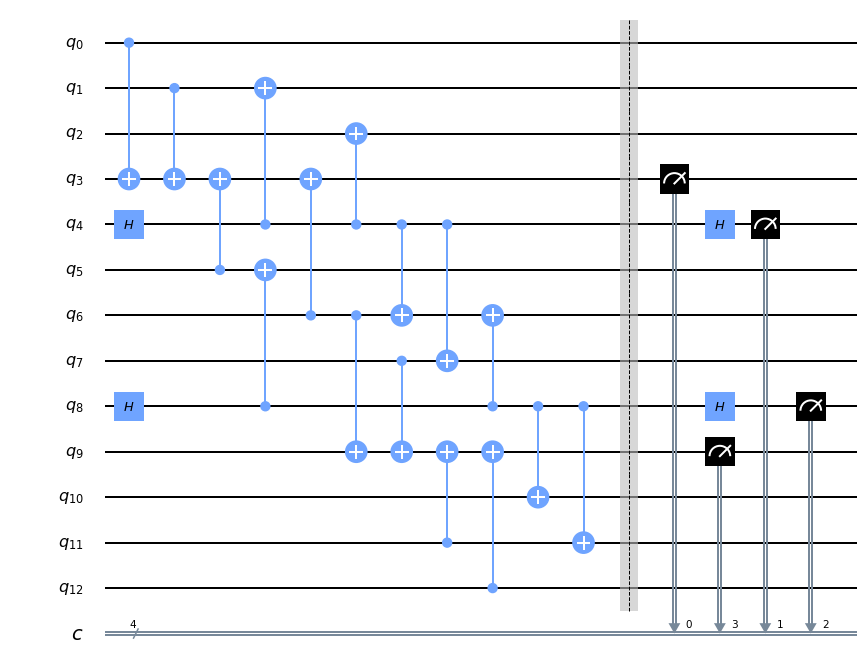

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from qiskit import Aer, IBMQ, execute
from qiskit.providers.aer import noise
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
circ = QuantumCircuit(13)
circ.h(4)
circ.h(8)
circ.cx(0,3)
circ.cx(1,3)
circ.cx(5,3)
circ.cx(6,3)
circ.cx(6,9)
circ.cx(7,9)
circ.cx(11,9)
circ.cx(12,9)
circ.cx(4,1)
circ.cx(4,2)
circ.cx(4,6)
circ.cx(4,7)
circ.cx(8,5)
circ.cx(8,6)
circ.cx(8,10)
circ.cx(8,11)
meas = QuantumCircuit(13,4)
meas.barrier(range(13))
meas.measure(3,0)
meas.h(4)
meas.measure(4,1)
meas.h(8)
meas.measure(8,2)
meas.measure(9,3)
qc=circ+meas
qc.draw()

### Simulation without noise. Notice that the stabilizers change the state of the middle two ancilla qubits (into Hadamrd state).

In [2]:
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info.operators import Kraus, SuperOp
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import QuantumError, ReadoutError
from qiskit.providers.aer.noise.errors import pauli_error
from qiskit.providers.aer.noise.errors import depolarizing_error
from qiskit.providers.aer.noise.errors import thermal_relaxation_error

In [33]:
noise_model = NoiseModel()
error = depolarizing_error(0.05, 1)
noise_model.add_all_qubit_quantum_error(error, ['u1','u2','u3','u4','u5','u6','u7','u8','u9','u10','u11','u12','u13'])
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u1', 'u2', 'u3']
  Instructions with noise: ['u10', 'u12', 'u1', 'u5', 'u9', 'u13', 'u2', 'u4', 'u7', 'u6', 'u3', 'u8', 'u11']
  All-qubits errors: ['u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12', 'u13']


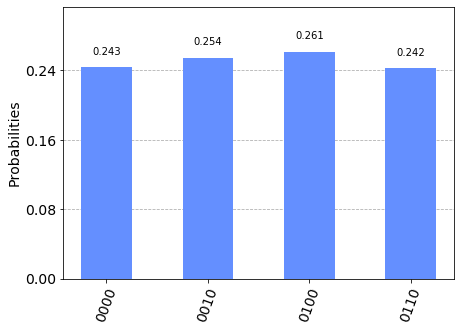

In [3]:
simulator = QasmSimulator()
job = execute(qc, simulator)
result_ideal = job.result()
plot_histogram(result_ideal.get_counts(0))

### Simulation with noise. Notice that the no-noise results still dominate.

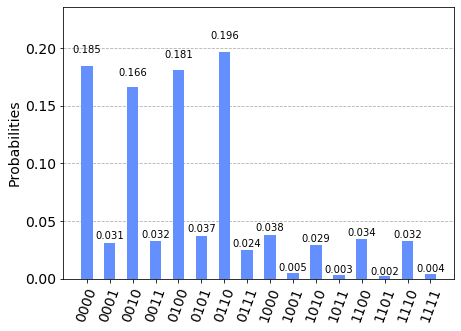

In [4]:
p_reset = 0.03
p_meas = 0.03
p_gate1 = 0.03

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_noise = job.result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise)

## Second minimal surface circuit

The circuit's image and its building in qiskit.

  ![title](Four4Cycle.png)

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

combien y a t-il de qubits ?  9


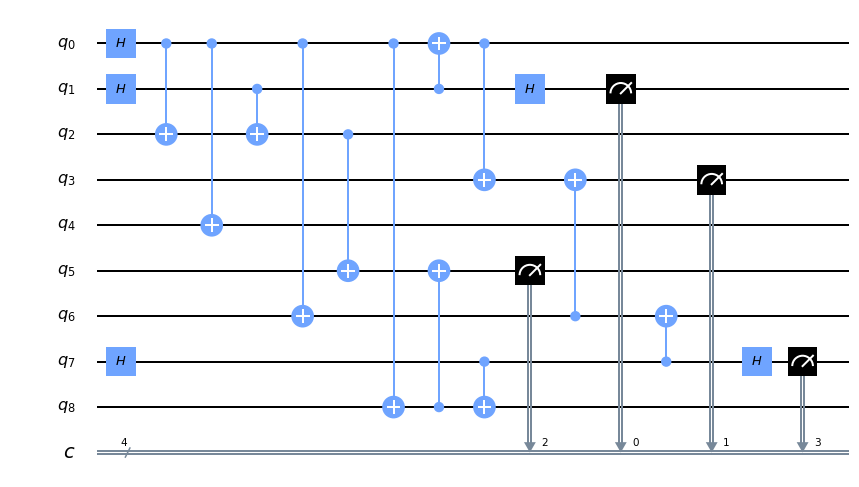

In [54]:
import numpy as np
from numpy import*
from qiskit import *
%matplotlib inline

#number of qubits
n=int(input("combien y a t-il de qubits ?  "))
circ = QuantumCircuit(n,int(n/2))
L=int(n**(1/2))

#def matrix
M=ones((L,L))
for i in range(L):
    for j in range(L):
        if (i+j)%2==0:
            M[i,j]=0


#encoding
circ.h(0)
for i in range(1,int(n/2)+1):
    circ.cx(0,2*i)


for i in range(L):
    for j in range(L):
        if M[i,j]==1:  #anscilla qubit
            if (i%2==0 and i!=0 and i!=L-1 and j!=0 and j!=L-1):    #C-Z operation
                circ.cx(L*i+j+1,L*i+j)
                circ.cx(L*i+j-1,L*i+j)
                circ.cx(L*i+j+L,L*i+j)
                circ.cx(L*i+j-L,L*i+j)
            elif (i%2==1 and i!=0 and i!=L-1 and j!=0 and j!=L-1):   #C-X operation
                circ.h(L*i+j)
                circ.cx(L*i+j,L*i+j+1)
                circ.cx(L*i+j,L*i+j-1)
                circ.cx(L*i+j,L*i+j+L)
                circ.cx(L*i+j,L*i+j-L)
            elif (j==0 or j==L-1):     #Frontière gauche/droite
                circ.cx(L*i+j-L,L*i+j)
                circ.cx(L*i+j+L,L*i+j)
            elif (i==0 or i==L-1):    #Frontière haut/bas
                circ.h(L*i+j)
                circ.cx(L*i+j,L*i+j+1)
                circ.cx(L*i+j,L*i+j-1)
                



#Measurements
k=0
for i in range(L):
    for j in range(L):
        if M[i,j]==1:          #anscilla qubit
            if j%2==0:   #C-Z
                circ.measure(i*L+j,k)
                k=k+1
            elif j%2==1 :     # C-X
                circ.h(i*L+j)
                circ.measure(i*L+j,k)
                k=k+1

#Zbasis
#circ.measure(3,0)
#circ.measure(5,1)
#Xbasis
#circ.h(1)
#circ.h(7)
#circ.measure(1,2)
#circ.measure(7,3)

circ.draw()






### Results without noise. Notice that as before, the stabilizers change the ancilla qubit measurements results.

Credentials are already in use. The existing account in the session will be replaced.


{'1110': 133, '1111': 145, '0000': 102, '0111': 137, '1000': 127, '1001': 117, '0001': 132, '0110': 131}


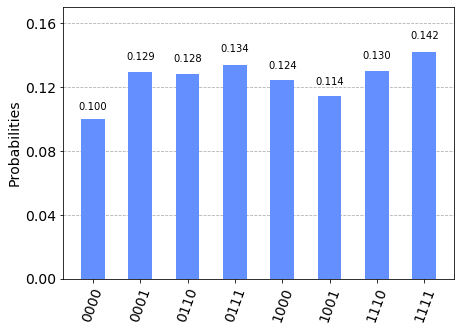

In [55]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Results with noise. Notice that as before, the stabilizers change the ancilla qubit measurements results. After showing the unfiltered results ($2^5 = 32$ possisble results) we use a function in order to filter the least probable ones. The noise still change the clean simulator results due to this cicuit complexity.

In [76]:
from qiskit.providers.aer import noise  # import Aer noise models

# Choose a real device to simulate
IBMQ.load_account()
device = IBMQ.get_backend('ibmq_16_melbourne')
properties = device.properties()
coupling_map = device.configuration().coupling_map

# Generate an Aer noise model for device
noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates

C:\Users\User\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '
C:\Users\User\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:595: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


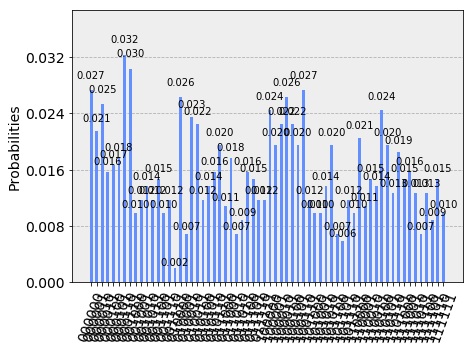

In [127]:
# Perform noisy simulation
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend,
                  coupling_map=coupling_map,
                  noise_model=noise_model,
                  basis_gates=basis_gates)
sim_result = job_sim.result()
counts = sim_result.get_counts(circ)

#Plot results
from qiskit import visualization
#print(counts)
visualization.plot_histogram(counts)

In [128]:
print(counts)

{'011110': 12, '011011': 9, '000011': 16, '011000': 11, '010100': 12, '111001': 16, '010010': 24, '000110': 33, '110011': 14, '001101': 10, '001110': 12, '001100': 15, '110111': 19, '000010': 26, '000100': 17, '100100': 23, '100101': 20, '110010': 15, '001010': 14, '001111': 2, '011010': 7, '101110': 12, '110101': 20, '010111': 20, '001001': 12, '100011': 27, '100000': 25, '011111': 12, '100110': 28, '101100': 7, '101101': 6, '001000': 10, '111100': 13, '111111': 10, '111101': 9, '010001': 7, '100010': 23, '111011': 7, '010110': 16, '111000': 15, '111010': 13, '110001': 11, '000111': 31, '101011': 20, '010000': 27, '110100': 25, '110110': 13, '100111': 12, '000000': 28, '101001': 10, '011100': 16, '000101': 18, '010011': 23, '000001': 22, '010101': 14, '111110': 15, '101000': 10, '011001': 18, '110000': 21, '011101': 15, '101111': 10, '001011': 12, '101010': 14, '100001': 20}


reduced_counts function which gets rid of all the results that got less than a cretain threshold of counts. 

In [129]:
def reduced_counts (counts, #results and their respective counts
                    threshold #integer under which any result is moved from the counts 
                   ):
    results_over_threshold = 0
    for result in counts:
        if counts[result] < threshold:
            results_over_threshold = 0
            counts.pop(result)
            break
        else:
            results_over_threshold += 1
    if results_over_threshold == len(counts): #the counts dictionary is perfect and ready to send.
        return counts
    else:                                     #still low counts to remove. Repeat function!
        return (reduced_counts(counts,threshold))

1024 shots fired
threshold is 16.384
{'010010': 24, '000110': 33, '110111': 19, '000010': 26, '000100': 17, '100100': 23, '100101': 20, '110101': 20, '010111': 20, '100011': 27, '100000': 25, '100110': 28, '100010': 23, '000111': 31, '101011': 20, '010000': 27, '110100': 25, '000000': 28, '000101': 18, '010011': 23, '000001': 22, '011001': 18, '110000': 21, '100001': 20}


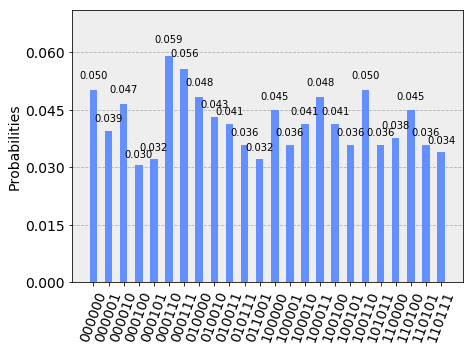

In [130]:
counts1 = counts
shots = 0
for result in counts1:
    shots += counts1[result]
    
print(shots, "shots fired")

threshold = 0.016*shots
print("threshold is", threshold)

print(reduced_counts(counts1,threshold))
visualization.plot_histogram(counts)